Text(0, 0.5, 'Y')

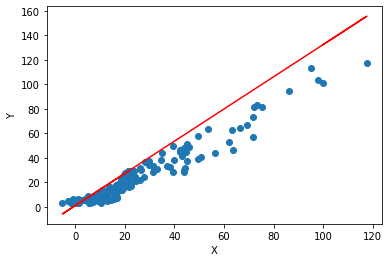

In [2]:
# Question 2a
import numpy as np
import matplotlib.pyplot as pt
import csv
with open('D:/CMU_Sem1_books_notes/AI_Machine_Learning/hw2/hw2/data.csv', 'r') as csv_file: 
    csv_reader = csv.reader(csv_file)
    data1 = []
    for row in csv_reader:
        if len(row) !=0:
            data1 = data1 + [row]
csv_file.close()
data = np.array(data1).astype(np.float)
n=np.size(data)
b0=1
b1=2
alpha=0.001
nit=10000
x=data[:,0]
y=data[:,1]
#pt.scatter(x,y)
#pt.ylabel("Y")
#pt.xlabel("X")

def cost_and_gradient(data,b0,b1):
    j=0
    GD0=0
    GD1=0
    for i in range(n):
        j+=(1/(2*n))*np.sum(np.square((b0+b1*data[i,0])-data[i,1]))
        GD0=(1/(n))*np.sum(((b0+b1*data[i,0])-data[i,1]))
        GD=(1/(n))*np.sum((((b0+b1*data[i,0])-data[i,1])*data[i,0]))
        return j,GD0,GD
j,GD0,GD=cost_and_gradient(data,b0,b1)
def gradient_descent(data,b0,b1,alpha,nit):
    B=np.zeros((nit,2))
    Cost=np.zeros((nit,1))
    iterr = np.zeros((nit,1))
    p=0
    for it in range(nit):
        CG=cost_and_gradient(data,b0,b1)
        b0=b0-alpha*CG[1]
        b1=b1-alpha*CG[2]
        B[it][0]=b0
        B[it][1]=b1
        Cost[it]=CG[0]
        p=p+1
        iterr[it]= p
    Bf=B[nit-1,:]
    return Bf,Cost,iterr
Bf,Cost,iterr=gradient_descent(data,b0,b1,alpha,nit)
Y=Bf[0]+Bf[1]*x
pt.scatter(x,y)
pt.plot(x,Y,color="red")
pt.xlabel('X')
pt.ylabel('Y')



[[1.000e+00]
 [2.000e+00]
 [3.000e+00]
 ...
 [9.998e+03]
 [9.999e+03]
 [1.000e+04]]


Text(0, 0.5, 'Cost')

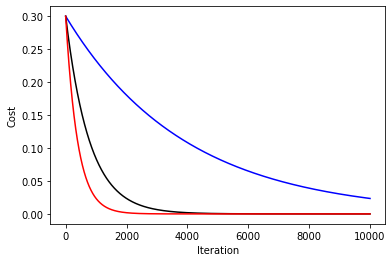

In [3]:
#Question 2b

Bf1,Cost1,iterr1=gradient_descent(data,b0,b1,0.0001,nit)
Bf2,Cost2,iterr2=gradient_descent(data,b0,b1,0.0005,nit)
Bf3,Cost3,iterr3=gradient_descent(data,b0,b1,0.001,nit)
print(iterr1)

pt.plot(iterr1,Cost1,color="blue")
pt.plot(iterr1,Cost2,color="black")
pt.plot(iterr1,Cost3,color="red")
pt.xlabel('Iteration')
pt.ylabel('Cost')

Question 2C:

The learning rates decide the convergence of the cost function. The rates given were 0.0001,0.0005 and 0.001. From the graph it can be seen that higher the learning rate (red curve,learning rate=0.001) faster the conversion. But if the learning rate is higher than the threshold then the path becomes unstable.

[[1.000e+00]
 [2.000e+00]
 [3.000e+00]
 ...
 [9.998e+03]
 [9.999e+03]
 [1.000e+04]]


Text(0, 0.5, 'Cost')

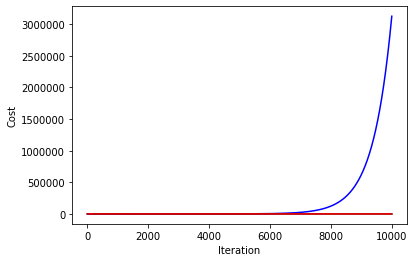

In [4]:
#Question 2d
Bf1,Cost4,iterr4=gradient_descent(data,b0,b1,1.57,nit)
Bf2,Cost5,iterr5=gradient_descent(data,b0,b1,1.4,nit)
Bf3,Cost6,iterr6=gradient_descent(data,b0,b1,1,nit)
print(iterr1)

pt.plot(iterr1,Cost4,color="blue")
pt.plot(iterr1,Cost5,color="black")
pt.plot(iterr1,Cost6,color="red")
pt.xlabel('Iteration')
pt.ylabel('Cost')

#Question 2d Continuation:
When the learning rate is 1.57 divergence is observed. The Blue curve shows the diverging cost function. Number of iteration required to observe the divergence is 15

Text(0, 0.5, 'Cost')

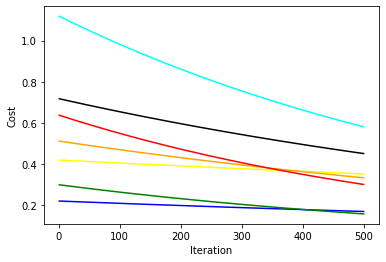

In [5]:
#Question 2e
b0=1
b1=2
alpha=0.0005
nit=500
batch_size=20
number_of_parts=np.int_(len(data)/batch_size)
data_split=np.array_split(data,number_of_parts)
C1=np.zeros((nit,number_of_parts))
I1=np.zeros((nit,number_of_parts))
for i in range(number_of_parts):
    Bf,Cost,iterr=gradient_descent(np.asarray(data_split[i]),b0,b1,0.0005,nit)
    C1 = np.append(C1, Cost,axis=1)
    C1=np.unique(C1,axis=1)
    I1=np.append(I1, iterr,axis=1)

pt.plot(I1[:,13],C1[:,1],color="blue")
pt.plot(I1[:,13],C1[:,2],color="green")
pt.plot(I1[:,13],C1[:,3],color="yellow")
pt.plot(I1[:,13],C1[:,4],color="orange")
pt.plot(I1[:,13],C1[:,5],color="red")
pt.plot(I1[:,13],C1[:,6],color="black")
pt.plot(I1[:,13],C1[:,7],color="cyan")

pt.xlabel('Iteration')
pt.ylabel('Cost')
 
    

#Question 2e Continuation:

1)For the same learning rate mini batch gradient descent converges quickly.
2)Cost function has higher values due to lesser data
